In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 데이터 준비 과정

In [2]:
january_df = pd.read_csv("LOCAL_PEOPLE_DONG_202201.csv")
february_df = pd.read_csv("LOCAL_PEOPLE_DONG_202202.csv")
march_df = pd.read_csv("LOCAL_PEOPLE_DONG_202103.csv")
april_df = pd.read_csv("LOCAL_PEOPLE_DONG_202104.csv")
may_df = pd.read_csv("LOCAL_PEOPLE_DONG_202105.csv")
june_df = pd.read_csv("LOCAL_PEOPLE_DONG_202106.csv")
july_df = pd.read_csv("LOCAL_PEOPLE_DONG_202107.csv")
august_df = pd.read_csv("LOCAL_PEOPLE_DONG_202108.csv")
september_df = pd.read_csv("LOCAL_PEOPLE_DONG_202109.csv")
october_df = pd.read_csv("LOCAL_PEOPLE_DONG_202110.csv")
november_df = pd.read_csv("LOCAL_PEOPLE_DONG_202111.csv")
december_df = pd.read_csv("LOCAL_PEOPLE_DONG_202112.csv")

In [3]:
L = [january_df, february_df, march_df, april_df, may_df, june_df,
    july_df, august_df, september_df, october_df, november_df, december_df]

In [4]:
# 데이터 전처리
for df in L:
    df.loc[:, '여자70세이상생활인구수'] = df.loc[:, '여자65세부터69세생활인구수']

    age = 65

    while age>10:
        str1 = f"여자{age}세부터{age+4}세생활인구수"
        str2 = f"여자{age-5}세부터{age-1}세생활인구수"
        df.loc[:, str1] = df.loc[:, str2]
        age-=5
    
    df.loc[:, '여자10세부터14세생활인구수'] = df.loc[:, '여자0세부터9세생활인구수']
    df.loc[:, '여자0세부터9세생활인구수'] = df.loc[:, '남자70세이상생활인구수']
    df.loc[:, '남자70세이상생활인구수'] = df.loc[:, '남자65세부터69세생활인구수']

    age = 65

    while age>10:
        str1 = f"남자{age}세부터{age+4}세생활인구수"
        str2 = f"남자{age-5}세부터{age-1}세생활인구수"
        df.loc[:, str1] = df.loc[:, str2]
        age-=5

    df.loc[:, '남자10세부터14세생활인구수'] = df.loc[:, '남자0세부터9세생활인구수']
    df.loc[:, '남자0세부터9세생활인구수'] = df.loc[:, '총생활인구수']
    df.loc[:, '총생활인구수'] = df.loc[:, '행정동코드']
    df.loc[:, '행정동코드'] = df.loc[:, '시간대구분']
    df.loc[:, '시간대구분'] = df.loc[:, '기준일ID']
    df.loc[:, '기준일ID'] = df.index

    df.index = range(len(df.index))

# 종속 변수 DataFrame 만들기!

In [5]:
# 데이터 전처리
# 월별 날짜 / 시간 / 행정동코드 / 남성과 여성 노인 인구 수 data

elderly = list()

for i, df in enumerate(L):
    elderly.append(
        pd.DataFrame({
            '날짜': df.loc[(df['시간대구분']>=6) & (df['시간대구분']<=21), '기준일ID'],
            '시간': df.loc[(df['시간대구분']>=6) & (df['시간대구분']<=21), '시간대구분'],
            '행정동코드': df.loc[(df['시간대구분']>=6) & (df['시간대구분']<=21), '행정동코드'],
            '남성 노인 인구 수': np.add(df.loc[(df['시간대구분']>=6) & (df['시간대구분']<=21), '남자65세부터69세생활인구수'], 
                                 df.loc[(df['시간대구분']>=6) & (df['시간대구분']<=21), '남자70세이상생활인구수']),
            '여성 노인 인구 수': np.add(df.loc[(df['시간대구분']>=6) & (df['시간대구분']<=21), '여자65세부터69세생활인구수'], 
                                 df.loc[(df['시간대구분']>=6) & (df['시간대구분']<=21), '여자70세이상생활인구수'])}
        )
    )
    
# 주의: 리스트에서 1월은 0, ... 12월은 11 인덱스
elderly[0]

,날짜,시간,행정동코드,남성 노인 인구 수,여성 노인 인구 수
2544,20220101,6,11350630,3308.1462,5126.3568
2545,20220101,6,11230610,1895.4611,2913.0751
2546,20220101,6,11170660,696.3820,952.3260
2547,20220101,6,11110530,906.3836,1390.1362
2548,20220101,6,11380631,1818.9450,2688.5604
...,...,...,...,...,...
314603,20220131,21,11590550,1315.9925,1957.8052
314604,20220131,21,11650660,1414.7241,1924.0585
314605,20220131,21,11350720,796.1973,1084.6723
314606,20220131,21,11140590,527.7967,666.7582


In [6]:
for i, df in enumerate(elderly):
    # 각 행정동 변환
    df.loc[df['행정동코드'] == 11500510, '행정동코드'] = '강서구 염창동'
    df.loc[df['행정동코드'] == 11500520, '행정동코드'] = '강서구 등촌1동'
    df.loc[df['행정동코드'] == 11500530, '행정동코드'] = '강서구 등촌2동'
    df.loc[df['행정동코드'] == 11500535, '행정동코드'] = '강서구 등촌3동'
    df.loc[df['행정동코드'] == 11500590, '행정동코드'] = '강서구 화곡본동'
    df.loc[df['행정동코드'] == 11500540, '행정동코드'] = '강서구 화곡1동'
    df.loc[df['행정동코드'] == 11500550, '행정동코드'] = '강서구 화곡2동'
    df.loc[df['행정동코드'] == 11500560, '행정동코드'] = '강서구 화곡3동'
    df.loc[df['행정동코드'] == 11500570, '행정동코드'] = '강서구 화곡4동'
    df.loc[df['행정동코드'] == 11500591, '행정동코드'] = '강서구 화곡6동'
    df.loc[df['행정동코드'] == 11500593, '행정동코드'] = '강서구 화곡8동'
    df.loc[df['행정동코드'] == 11500603, '행정동코드'] = '강서구 가양1동'
    df.loc[df['행정동코드'] == 11500604, '행정동코드'] = '강서구 가양2동'
    df.loc[df['행정동코드'] == 11500605, '행정동코드'] = '강서구 가양3동'
    df.loc[df['행정동코드'] == 11500611, '행정동코드'] = '강서구 발산1동'
    df.loc[df['행정동코드'] == 11500620, '행정동코드'] = '강서구 공항동'
    df.loc[df['행정동코드'] == 11500630, '행정동코드'] = '강서구 방화1동'
    df.loc[df['행정동코드'] == 11500640, '행정동코드'] = '강서구 방화2동'
    df.loc[df['행정동코드'] == 11500641, '행정동코드'] = '강서구 방화3동'
    df.loc[df['행정동코드'] == 11500615, '행정동코드'] = '강서구 우장산동'

In [7]:
spring = pd.concat([elderly[2], elderly[3], elderly[4]])
summer = pd.concat([elderly[5], elderly[6], elderly[7]])
autumn = pd.concat([elderly[8], elderly[9], elderly[10]])
winter = pd.concat([elderly[11], elderly[0], elderly[1]])

In [8]:
dong_names = ['염창동', '등촌1동', '등촌2동', '등촌3동', '화곡본동', 
     '화곡1동', '화곡2동', '화곡3동', '화곡4동', '화곡6동', '화곡8동',
     '가양1동', '가양2동', '가양3동', '발산1동', '공항동',
     '방화1동', '방화2동', '방화3동', '우장산동']

## 봄 남성 ~ 겨울 여성 8가지 Series 생성

In [9]:
spring_men = pd.Series([spring.loc[spring['행정동코드'] == '강서구 염창동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 등촌1동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 등촌2동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 등촌3동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡본동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡1동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡2동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡3동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡4동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡6동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡8동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 가양1동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 가양2동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 가양3동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 발산1동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 공항동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 방화1동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 방화2동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 방화3동', '남성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 우장산동', '남성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [10]:
summer_men = pd.Series([summer.loc[summer['행정동코드'] == '강서구 염창동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 등촌1동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 등촌2동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 등촌3동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡본동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡1동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡2동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡3동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡4동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡6동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡8동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 가양1동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 가양2동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 가양3동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 발산1동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 공항동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 방화1동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 방화2동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 방화3동', '남성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 우장산동', '남성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [11]:
autumn_men = pd.Series([autumn.loc[autumn['행정동코드'] == '강서구 염창동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 등촌1동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 등촌2동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 등촌3동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡본동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡1동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡2동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡3동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡4동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡6동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡8동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 가양1동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 가양2동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 가양3동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 발산1동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 공항동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 방화1동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 방화2동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 방화3동', '남성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 우장산동', '남성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [12]:
winter_men = pd.Series([winter.loc[winter['행정동코드'] == '강서구 염창동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 등촌1동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 등촌2동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 등촌3동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡본동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡1동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡2동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡3동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡4동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡6동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡8동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 가양1동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 가양2동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 가양3동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 발산1동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 공항동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 방화1동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 방화2동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 방화3동', '남성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 우장산동', '남성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [13]:
spring_women = pd.Series([spring.loc[spring['행정동코드'] == '강서구 염창동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 등촌1동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 등촌2동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 등촌3동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡본동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡1동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡2동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡3동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡4동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡6동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 화곡8동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 가양1동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 가양2동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 가양3동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 발산1동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 공항동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 방화1동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 방화2동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 방화3동', '여성 노인 인구 수'].mean(),
                       spring.loc[spring['행정동코드'] == '강서구 우장산동', '여성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [14]:
summer_women = pd.Series([summer.loc[summer['행정동코드'] == '강서구 염창동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 등촌1동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 등촌2동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 등촌3동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡본동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡1동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡2동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡3동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡4동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡6동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 화곡8동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 가양1동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 가양2동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 가양3동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 발산1동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 공항동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 방화1동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 방화2동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 방화3동', '여성 노인 인구 수'].mean(),
                       summer.loc[summer['행정동코드'] == '강서구 우장산동', '여성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [15]:
autumn_women = pd.Series([autumn.loc[autumn['행정동코드'] == '강서구 염창동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 등촌1동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 등촌2동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 등촌3동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡본동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡1동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡2동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡3동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡4동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡6동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 화곡8동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 가양1동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 가양2동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 가양3동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 발산1동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 공항동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 방화1동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 방화2동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 방화3동', '여성 노인 인구 수'].mean(),
                       autumn.loc[autumn['행정동코드'] == '강서구 우장산동', '여성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [16]:
winter_women = pd.Series([winter.loc[winter['행정동코드'] == '강서구 염창동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 등촌1동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 등촌2동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 등촌3동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡본동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡1동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡2동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡3동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡4동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡6동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 화곡8동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 가양1동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 가양2동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 가양3동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 발산1동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 공항동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 방화1동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 방화2동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 방화3동', '여성 노인 인구 수'].mean(),
                       winter.loc[winter['행정동코드'] == '강서구 우장산동', '여성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

## 주중 / 주말 data

In [17]:
weekends = elderly[1][(elderly[1]['날짜'] == 20220205) | (elderly[1]['날짜'] == 20220206) | (elderly[1]['날짜'] == 20220212) |
                     (elderly[1]['날짜'] == 20220213) | (elderly[1]['날짜'] == 20220219) | (elderly[1]['날짜'] == 20220220) |
                     (elderly[1]['날짜'] == 20220226) | (elderly[1]['날짜'] == 20220227)]


weekdays = elderly[1][(elderly[1]['날짜'] == 20220201) | (elderly[1]['날짜'] == 20220202) | (elderly[1]['날짜'] == 20220203) |
                     (elderly[1]['날짜'] == 20220204) | (elderly[1]['날짜'] == 20220207) | (elderly[1]['날짜'] == 20220208) |
                     (elderly[1]['날짜'] == 20220209) | (elderly[1]['날짜'] == 20220210) | (elderly[1]['날짜'] == 20220211) |
                     (elderly[1]['날짜'] == 20220214) | (elderly[1]['날짜'] == 20220215) | (elderly[1]['날짜'] == 20220216) | 
                     (elderly[1]['날짜'] == 20220217) | (elderly[1]['날짜'] == 20220218) | (elderly[1]['날짜'] == 20220221) | 
                     (elderly[1]['날짜'] == 20220222) | (elderly[1]['날짜'] == 20220223) | (elderly[1]['날짜'] == 20220224) |
                     (elderly[1]['날짜'] == 20220225) | (elderly[1]['날짜'] == 20220228)]

In [18]:
weekdays_men = pd.Series([weekdays.loc[weekdays['행정동코드'] == '강서구 염창동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 등촌1동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 등촌2동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 등촌3동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡본동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡1동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡2동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡3동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡4동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡6동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡8동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 가양1동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 가양2동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 가양3동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 발산1동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 공항동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 방화1동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 방화2동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 방화3동', '남성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 우장산동', '남성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [19]:
weekends_men = pd.Series([weekends.loc[weekends['행정동코드'] == '강서구 염창동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 등촌1동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 등촌2동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 등촌3동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡본동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡1동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡2동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡3동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡4동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡6동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡8동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 가양1동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 가양2동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 가양3동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 발산1동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 공항동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 방화1동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 방화2동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 방화3동', '남성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 우장산동', '남성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [20]:
weekdays_women = pd.Series([weekdays.loc[weekdays['행정동코드'] == '강서구 염창동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 등촌1동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 등촌2동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 등촌3동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡본동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡1동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡2동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡3동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡4동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡6동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 화곡8동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 가양1동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 가양2동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 가양3동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 발산1동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 공항동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 방화1동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 방화2동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 방화3동', '여성 노인 인구 수'].mean(),
                       weekdays.loc[weekdays['행정동코드'] == '강서구 우장산동', '여성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

In [21]:
weekends_women = pd.Series([weekends.loc[weekends['행정동코드'] == '강서구 염창동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 등촌1동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 등촌2동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 등촌3동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡본동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡1동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡2동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡3동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡4동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡6동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 화곡8동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 가양1동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 가양2동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 가양3동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 발산1동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 공항동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 방화1동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 방화2동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 방화3동', '여성 노인 인구 수'].mean(),
                       weekends.loc[weekends['행정동코드'] == '강서구 우장산동', '여성 노인 인구 수'].mean()
                       ],
                      index = dong_names)

## 본격 DataFrame 만들기!!!!!!!!!!

In [22]:
Y = pd.DataFrame({
    '봄 남성 노인 인구 평균': spring_men, 
    '여름 남성 노인 인구 평균': summer_men, 
    '가을 남성 노인 인구 평균': autumn_men, 
    '겨울 남성 노인 인구 평균': winter_men, 
    '봄 여성 노인 인구 평균': spring_women, 
    '여름 여성 노인 인구 평균': summer_women, 
    '가을 여성 노인 인구 평균': autumn_women, 
    '겨울 여성 노인 인구 평균': winter_women,
    '주중 남성 노인 인구 평균': weekdays_men,
    '주말 남성 노인 인구 평균': weekends_men,
    '주중 여성 노인 인구 평균': weekdays_women,
    '주말 여성 노인 인구 평균': weekends_women
    },
index = dong_names)

In [50]:
Y

,봄 남성 노인 인구 평균,여름 남성 노인 인구 평균,가을 남성 노인 인구 평균,겨울 남성 노인 인구 평균,봄 여성 노인 인구 평균,여름 여성 노인 인구 평균,가을 여성 노인 인구 평균,겨울 여성 노인 인구 평균,주중 남성 노인 인구 평균,주말 남성 노인 인구 평균,주중 여성 노인 인구 평균,주말 여성 노인 인구 평균
염창동,1515.939882,1511.913673,1558.515038,1558.085261,2203.655285,2155.736951,2190.683063,2229.942022,1548.967378,1520.187417,2266.100383,2150.687429
등촌1동,1125.172653,1177.757031,1200.562977,1218.039432,1743.376167,1765.560579,1766.237138,1730.564714,1218.789742,1204.379812,1721.497334,1694.491746
등촌2동,870.469263,893.110874,885.675849,912.982537,1414.747661,1497.020215,1472.905143,1511.915875,892.511370,972.666410,1504.582716,1538.032191
등촌3동,2581.336851,2953.615542,3113.589454,2996.005674,3786.597664,4339.223959,4586.103460,4456.599760,2987.494787,2849.796973,4438.578127,4291.406244
화곡본동,1697.638911,1762.322824,1680.848747,1698.086859,2822.537761,2925.385132,2745.170627,2806.148316,1671.771103,1766.139155,2786.939330,2906.538875
화곡1동,3364.223750,3138.253121,2964.140703,3129.662639,5077.092039,4720.709765,4461.041667,4792.202156,3106.045431,3286.415684,4737.943457,4926.500271
화곡2동,751.759447,761.483111,713.719549,744.732526,1389.537525,1394.675435,1322.436296,1326.775042,726.281283,784.825435,1303.554854,1409.252570
화곡3동,1195.577108,1294.458617,1358.185630,1400.495303,1999.241460,2161.726399,2259.860873,2254.737485,1370.105168,1404.860363,2245.610486,2233.239004
화곡4동,1190.046598,1197.953900,1176.746628,1188.019420,1918.694390,1968.635405,1952.458207,1909.696728,1155.146936,1258.351932,1858.493142,1981.369423
화곡6동,1356.673188,1316.961037,1262.223114,1291.329074,1926.369739,1886.426439,1845.916888,1915.911279,1263.554703,1334.905395,1909.206384,1948.438223


In [23]:
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False, 'figure.figsize':(15,8)}, style='whitegrid')

In [25]:
import matplotlib.pyplot as plt

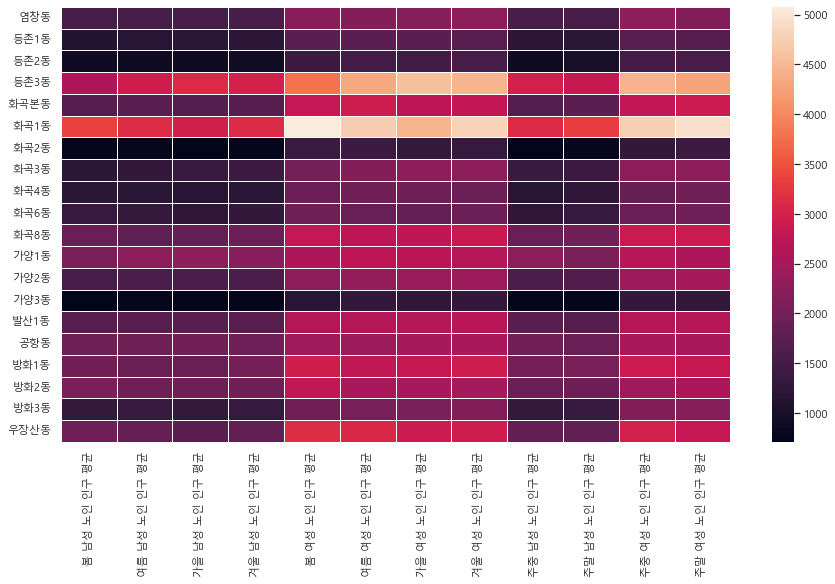

In [26]:
sns.heatmap(Y, linewidths = 1)

fig1 = plt.gcf()        

fig1.savefig('images/heatmap.png')

In [57]:
Y.to_csv('Y_생활인구.csv', encoding='utf-8-sig')

In [55]:
y = Y[['주중 남성 노인 인구 평균', '주중 여성 노인 인구 평균', '주말 남성 노인 인구 평균', '주말 여성 노인 인구 평균']].sum(axis=1)

염창동     1907.533881
등촌1동    1470.143538
등촌2동    1198.547043
등촌3동    3713.036457
화곡본동    2229.355217
화곡1동    3921.994444
화곡2동    1014.918069
화곡3동    1807.857827
화곡4동    1506.820039
화곡6동    1586.380544
화곡8동    2391.785768
가양1동    2466.717905
가양2동    1982.590367
가양3동    1021.684644
발산1동    2184.931433
공항동     2246.022336
방화1동    2448.133868
방화2동    2172.547292
방화3동    1728.943714
우장산동    2405.430166
dtype: float64

In [29]:
X = pd.read_csv('X_노인주민등록인구.csv', index_col=0)

In [56]:
ek = pd.DataFrame({'노인주민등록인구': X['노인 주민등록인구 수'],
                  '생활인구': y/4},
                 index = X.index)

In [57]:
for i, element in enumerate(ek['노인주민등록인구']):
    ek['노인주민등록인구'][i] = int(element.replace(',','')) #콤마제거 후 정수로 받음

C:\Users\thsth\AppData\Local\Temp\ipykernel_8336\866731388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ek['노인주민등록인구'][i] = int(element.replace(',','')) #콤마제거 후 정수로 받음


In [58]:
ek.diff(axis=1)

,노인주민등록인구,생활인구
동 분류,,
염창동,NaN,-757.514348
등촌1동,NaN,-514.210341
등촌2동,NaN,-700.051828
등촌3동,NaN,-719.180968
화곡본동,NaN,-714.152884
화곡1동,NaN,-1193.773789
화곡2동,NaN,-723.021464
화곡3동,NaN,-726.546245
화곡4동,NaN,-832.659642


In [54]:
ek

,노인주민등록인구,생활인구
동 분류,,
염창동,2629,1907.533881
등촌1동,1974,1470.143538
등촌2동,1927,1198.547043
등촌3동,4361,3713.036457
화곡본동,2997,2229.355217
화곡1동,5208,3921.994444
화곡2동,1779,1014.918069
화곡3동,2540,1807.857827
화곡4동,2396,1506.820039
